In [31]:
from torch import nn, optim
import numpy as np
import pickle as p
import torch
from tqdm.notebook import trange
from tqdm import tqdm
import matplotlib.pyplot as plt

from network import ConvNet
from sklearn.metrics import f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from dataset import CogDataset

In [37]:
# function for training and evaluation
def test(model, test_dataloader):
    accuracies = []
    f1_scores = []

    with torch.no_grad():

        model.eval()

        running_accuracy = 0.0
        running_f1 = 0.0

        for input, target in test_dataloader:

            output = model(input)

            prediction = torch.argmax(output, dim=1).float()   

            for o, t in zip(prediction, target):
                if o == t:
                    running_accuracy+=1/len(test_dataloader)
            #running_f1 += f1_score(target, prediction)

            #running_f1 /= len(val_dataloader)

            accuracies.append(running_accuracy)
            #f1_val.append(running_f1)

            # output
            if len(accuracies) % 20 == 0:
                tqdm.write('No. {} (test) -- acc: {:.4f}'.format(len(accuracies), running_accuracy))

    # print last value of metrics
        tqdm.write('Final accuracy: {:.4f}'.format(running_accuracy))

    # make metrics callable outside this function
    test.accuracy = accuracies
    # test.f1_score = f1_scores

In [33]:
# load data and label files
# shape = [2284, 200, 3, 9] --> [datasets, time series, channels, devices]
data = p.load(open(r"data/test.pkl", "rb"))
labels = p.load(open(r"data/labels_test.pkl", "rb"))
print(data.shape)

batch_size = 1

# create datasets
test_dataset = CogDataset(data, labels, train=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(2288, 8, 200, 3)


In [34]:
# load model for testing
net_num = 0
model = ConvNet()
model.load_state_dict(torch.load("trained_models/net_" + str(net_num) + ".pt"))

<All keys matched successfully>

In [38]:
# test model
test(model.double(), test_dataloader)

No. 20 (test) -- acc: 0.0022
No. 40 (test) -- acc: 0.0022
No. 60 (test) -- acc: 0.0044
No. 80 (test) -- acc: 0.0066
No. 100 (test) -- acc: 0.0066
No. 120 (test) -- acc: 0.0131
No. 140 (test) -- acc: 0.0153
No. 160 (test) -- acc: 0.0175
No. 180 (test) -- acc: 0.0218
No. 200 (test) -- acc: 0.0240
No. 220 (test) -- acc: 0.0240
No. 240 (test) -- acc: 0.0328
No. 260 (test) -- acc: 0.0349
No. 280 (test) -- acc: 0.0415
No. 300 (test) -- acc: 0.0437
No. 320 (test) -- acc: 0.0524
No. 340 (test) -- acc: 0.0568
No. 360 (test) -- acc: 0.0590
No. 380 (test) -- acc: 0.0633
No. 400 (test) -- acc: 0.0655
No. 420 (test) -- acc: 0.0721
No. 440 (test) -- acc: 0.0786
Final accuracy: 0.0786


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


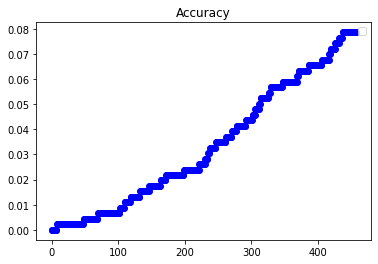

In [36]:
# plot metrics

# accuracy
plt.scatter(np.arange(len(test.accuracy)), test.accuracy, color="b")
plt.title("Accuracy")
plt.legend()
plt.show()